#### T20 World Cup 2022 Analysis
##### Project by: Aakanksha Panjwani

Data: https://statso.io/t20-world-cup-2022-dataset/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [105]:
data = pd.read_csv(r"E:\BSc DS&BA\Projects\t20-world-cup-22.csv")

In [6]:
abandoned = [False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False]
data['match_abandoned'] = abandoned

In [121]:
data.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25


#### Key to Variables

In [8]:
data.columns

Index(['venue', 'team1', 'team2', 'stage', 'toss winner', 'toss decision',
       'first innings score', 'first innings wickets', 'second innings score',
       'second innings wickets', 'winner', 'won by', 'player of the match',
       'top scorer', 'highest score', 'best bowler', 'best bowling figure',
       'match_abandoned'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [10]:
pd.isnull(data).sum()

venue                     0
team1                     0
team2                     0
stage                     0
toss winner               3
toss decision             3
first innings score       3
first innings wickets     3
second innings score      3
second innings wickets    3
winner                    4
won by                    4
player of the match       4
top scorer                3
highest score             3
best bowler               3
best bowling figure       3
match_abandoned           0
dtype: int64

In [11]:
matchAbandoned = data.value_counts(data['match_abandoned'])
matchAbandoned

match_abandoned
False    29
True      4
dtype: int64

#### Four matches were abandoned either without a single ball bowled or a no result due to weather conditions. 

In [12]:
data.drop([data.index[5],data.index[8],data.index[12],data.index[13]], inplace=True)

In [13]:
pd.isnull(data).sum()

venue                     0
team1                     0
team2                     0
stage                     0
toss winner               0
toss decision             0
first innings score       0
first innings wickets     0
second innings score      0
second innings wickets    0
winner                    0
won by                    0
player of the match       0
top scorer                0
highest score             0
best bowler               0
best bowling figure       0
match_abandoned           0
dtype: int64

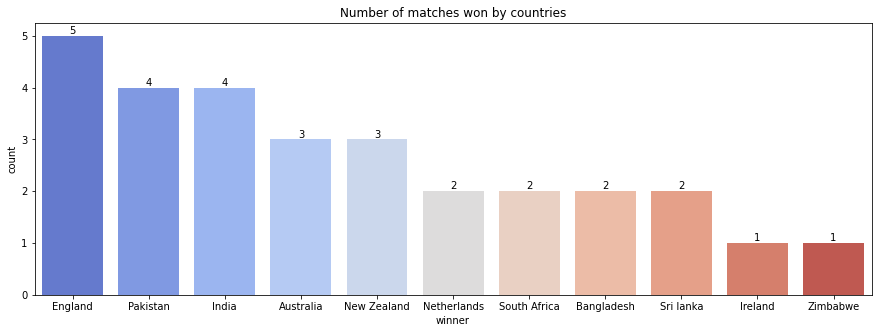

In [58]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='winner', data=data, order=data['winner'].value_counts(ascending=False).index, palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of matches won by countries")
plt.show()

#### As England won the T20 World Cup 2022, they won all 5 matches. India and Pakistan both won 4 matches.

won by
Runs       16
Wickets    13
dtype: int64


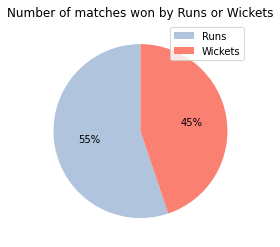

In [103]:
won_by = data.value_counts(data['won by'])
print(won_by)
label = won_by.index
counts = won_by.values
plt.pie(x=counts,startangle=90, colors=['lightsteelblue','salmon'], autopct="%0.0f%%")
plt.legend(label)
plt.title("Number of matches won by Runs or Wickets")
plt.show()

#### 16 matches were won by batting first while 13 matches were won by bowling first.

In [70]:
toss = data[['toss winner','toss decision','winner']]
toss.reset_index(drop=True, inplace=True)

In [17]:
main = []
for i in range(len(toss)):
    temp = list(toss.loc[i])
    main.append(temp)
    
tossWinMatch = tossLoseMatch = 0
    
for item in main:
    if (item[0] == item[2]):
        tossWinMatch += 1
    else:
        tossLoseMatch +=1
        
print("Number of occurences where team won toss AND match: ",tossWinMatch)
print("Number of occurences where team won toss BUT lost match: ",tossLoseMatch)

Number of occurences where team won toss AND match:  13
Number of occurences where team won toss BUT lost match:  16


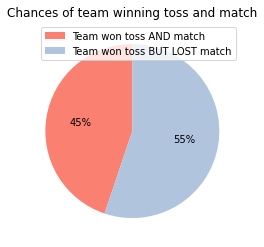

In [115]:
plt.pie(x=[tossWinMatch,tossLoseMatch], startangle=90, colors=['salmon','lightsteelblue'], autopct="%0.0f%%")
plt.legend(['Team won toss AND match','Team won toss BUT LOST match'], loc='best')
plt.title("Chances of team winning toss and match")
plt.show()

#### In 13 matches, the team who won the toss also won the match, whereas in 16 matches, the team who won the toss lost the match.

In [50]:
hS = data.groupby(['top scorer'], as_index=False)['highest score'].sum().sort_values(by='highest score', 
                                                                                                ascending=False).head(10)
hS

,top scorer,highest score
21,Virat Kohli,208.0
20,Suryakumar Yadav,129.0
15,Najmul Hossain,125.0
17,Rilee Rossouw,109.0
14,Mohammad Rizwan,106.0
6,Glenn Phillips,104.0
3,Colin Ackermann,103.0
4,Devon Conway,92.0
0,Alex Hales,86.0
8,Jos Buttler,73.0


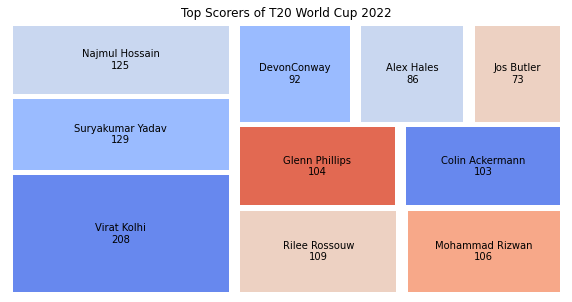

In [69]:
label = ["Virat Kolhi\n208","Suryakumar Yadav\n129","Najmul Hossain\n125","Rilee Rossouw\n109","Mohammad Rizwan\n106",
         "Glenn Phillips\n104","Colin Ackermann\n103","DevonConway\n92","Alex Hales\n86","Jos Butler\n73"]
fig = plt.figure(figsize=(10,5))
plt.axis("off")
squarify.plot(hS['highest score'], label=label, color=sns.color_palette("coolwarm"), pad=0.05)
plt.title("Top Scorers of T20 World Cup 2022")
plt.show()

#### Virat Kohli (India), Suryakumar Yadav (India) and Najmul Hossain (Bangladesh) were the top scorers contributing maximum runs for their respective countries.

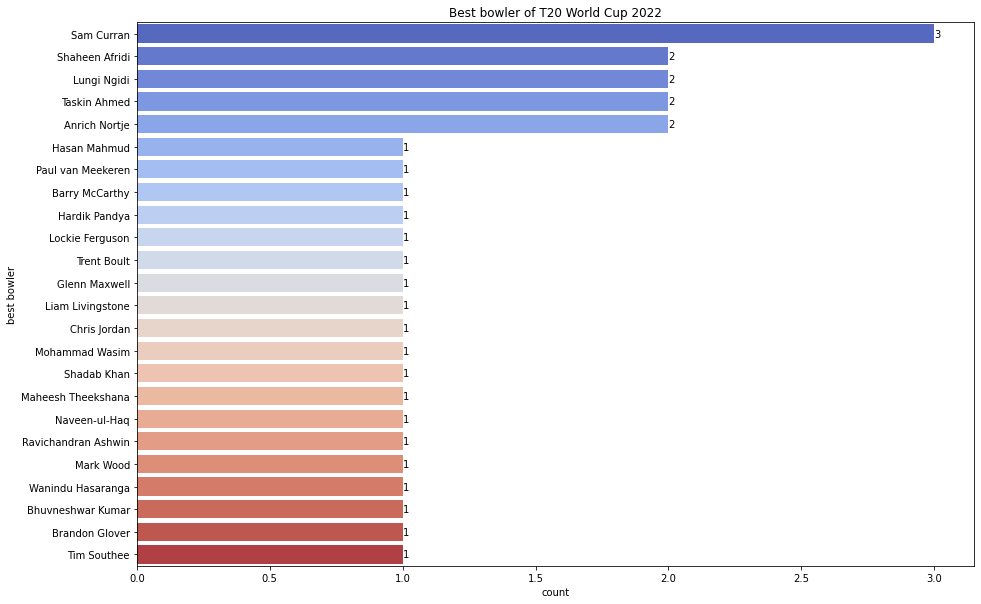

In [123]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(y='best bowler', data=data, order=data['best bowler'].value_counts(ascending=False).index, palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Best bowler of T20 World Cup 2022")
plt.show()

#### Sam Curran (England), Shaheen Afridi (Pakistan) and Lungi Ngidi (South Africa) had the best bowling figures across matches.

In [110]:
venueVSinnings = data.groupby(['venue'], as_index=False)[['first innings score','second innings score']].sum()
venueVSinnings

,venue,first innings score,second innings score
0,Adelaide Oval,1107.0,1022.0
1,Blundstone Arena,351.0,319.0
2,MCG,639.0,518.0
3,Optus Stadium,623.0,632.0
4,SCG,1229.0,842.0
5,The Gabba,652.0,591.0


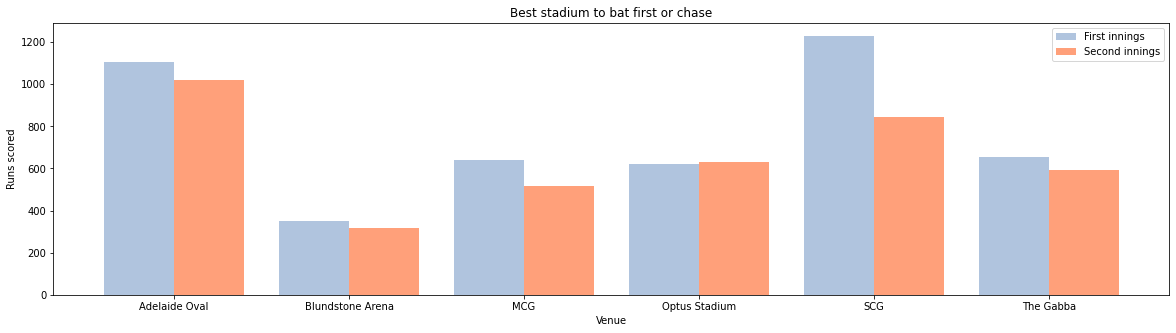

In [113]:
x = venueVSinnings['venue']
first = venueVSinnings['first innings score']
second = venueVSinnings['second innings score']
x_axis = np.arange(len(x))
fig = plt.figure(figsize=(20,5))
plt.bar(x_axis-0.2,first,0.4,color='lightsteelblue')
plt.bar(x_axis+0.2,second,0.4,color='lightsalmon')
plt.xticks(x_axis,x)
plt.xlabel("Venue")
plt.ylabel("Runs scored")
plt.title("Best stadium to bat first or chase")
plt.legend(["First innings","Second innings"])
plt.show()

#### SCG was the only stadium that was best to bat first. The others didn't make much difference while batting first or chasing.

In [117]:
venueVSwickets = data.groupby(['venue'], as_index=False)[['first innings wickets','second innings wickets']].sum()
venueVSwickets

,venue,first innings wickets,second innings wickets
0,Adelaide Oval,48.0,40.0
1,Blundstone Arena,21.0,11.0
2,MCG,31.0,26.0
3,Optus Stadium,42.0,25.0
4,SCG,38.0,57.0
5,The Gabba,26.0,28.0


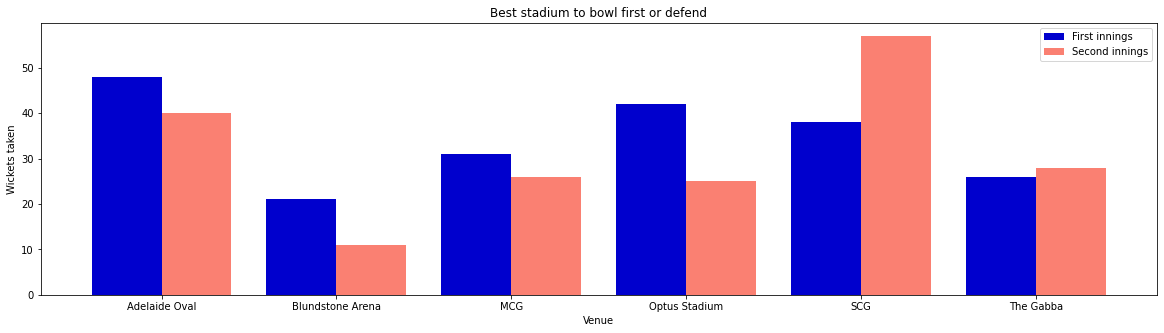

In [120]:
x = venueVSwickets['venue']
first = venueVSwickets['first innings wickets']
second = venueVSwickets['second innings wickets']
x_axis = np.arange(len(x))
fig = plt.figure(figsize=(20,5))
plt.bar(x_axis-0.2,first,0.4,color='mediumblue')
plt.bar(x_axis+0.2,second,0.4,color='salmon')
plt.xticks(x_axis,x)
plt.xlabel("Venue")
plt.ylabel("Wickets taken")
plt.title("Best stadium to bowl first or defend")
plt.legend(["First innings","Second innings"])
plt.show()

#### SCG was the best stadium to bowl while defending the target while Optus Stadium was the best stadium to bowl first.